## 1

In [121]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [122]:
dataset=pd.read_csv("Downloads/titanic-passengers.csv", sep=";")

#Preprocessing our data
def preprocess_data(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
    new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    new_data['Cabin']=new_data.Cabin.fillna('G6')
    new_data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
    new_data['FamilySize']=new_data['Parch']+new_data['SibSp']
    return new_data
data=preprocess_data(dataset)



In [123]:
data.head(-5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.000000,0,0,248740,13.0000,G6,S,0
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.000000,0,0,348123,7.6500,F G73,S,0
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.000000,0,0,350050,7.8542,G6,S,0
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.000000,0,4,349909,21.0750,G6,S,4
4,672,0,1,"Davidson, Mr. Thornton",1,31.000000,1,0,F.C. 12750,52.0000,B71,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,699,0,1,"Thayer, Mr. John Borland",1,49.000000,1,1,17421,110.8833,C68,C,2
882,775,1,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",0,54.000000,1,3,29105,23.0000,G6,S,4
883,809,0,2,"Meyer, Mr. August",1,39.000000,0,0,248723,13.0000,G6,S,0
884,278,0,2,"Parkes, Mr. Francis ""Frank""",1,29.699118,0,0,239853,0.0000,G6,S,0


In [115]:
x=data[['Sex','Age','Pclass','FamilySize','Fare']]
y= data["Survived"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

dtree= tree.DecisionTreeClassifier(criterion ='gini',splitter = 'random', max_leaf_nodes=10, min_samples_leaf=5,max_depth=4)
dtree.fit(x_train, y_train)   
y_pred=dtree.predict(x_test)  
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8268156424581006


## 2

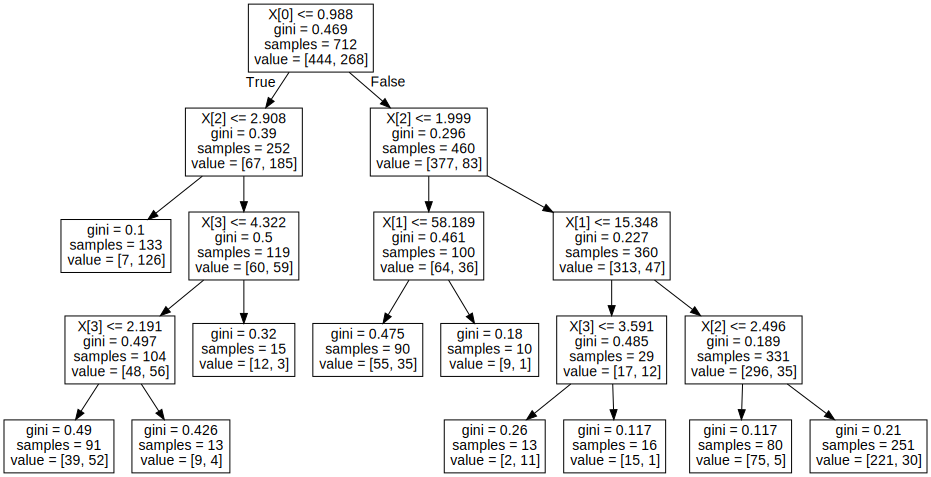

In [116]:
import graphviz
dot_data= tree.export_graphviz(dtree, out_file=None)
graph = graphviz.Source(dot_data)
graph.render('data')
graph

Men from 2nd class aging over 16 years old have died.
Women from 3rd class with more than 3 Family members have died, but those with less survived. 

## 3

In [15]:
x1=data[['Sex','Fare','Pclass','PassengerId']]
y1= data["Survived"]

x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1, test_size=0.20,random_state=10)

## 4

In [25]:
dtree1= tree.DecisionTreeClassifier(criterion ='gini',splitter = 'random', max_leaf_nodes=10, min_samples_leaf=5,max_depth=5)
dtree1.fit(x1_train, y1_train)   
y1_pred=dtree1.predict(x1_test)  
print("score1:{}".format(accuracy_score(y1_test, y1_pred)))

score1:0.7988826815642458


It's obvious that the first model is more aaccurate than the second one (score > score1)

## 5

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

x3=data[['Sex','Age','Pclass','FamilySize','Fare']]
y3= data["Survived"]

x3_train, x3_test, y3_train, y3_test = train_test_split(x3,y3, test_size=0.20,random_state=10)

clf=RandomForestClassifier(n_estimators=10)  
clf.fit(x3_train, y3_train)  
y3_pred=clf.predict(x3_test)  
print("Accuracy:", metrics.accuracy_score(y3_test, y3_pred))

Accuracy: 0.8547486033519553


The Random Forest model is more aaccurate than the normal Decision Tree model.